In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

In [2]:
pd.set_option(
    'display.max_rows', 100
)
url ="http://publicplansdata.org/api/"
focus_plans_list=['101', '110', '125', '179']
most_improved_list=['124', '90', '89', '134', '123']
least_improved_list=['41', '122', '120', '40', '119']
hardest_hit_list=['168', '130', '184', '151', '31']

In [3]:
#Create dictionary of study plan ids
study_plans_dict={"steady plans":focus_plans_list,
                        "most improved plans":most_improved_list,
                        "least improved plans":least_improved_list,
                        "hardest hit plans":hardest_hit_list}

In [4]:
#Make sure to use QDataset, NOT QDataSet.  Makes a big difference
paramsratios = {
    "q": "QDataset",
    "dataset": "pensiongasbschedules",
     "format": "json"
}
paramsbasicplandata = {
    "q": "QDataset",
    "dataset": "pensionplanbasics",
     "format": "json"
}

In [5]:
#create requests
ratiosresponse = requests.get(url, params = paramsratios)
plandataresponse = requests.get(url,params=paramsbasicplandata)

In [6]:
#create json response object
fundedratiosdata = ratiosresponse.json()
plandata = plandataresponse.json()

In [7]:
#change response object into DataFrame
funded_ratios_full = pd.DataFrame(fundedratiosdata[1:])
plan_data_full = pd.DataFrame(plandata[1:])

In [8]:
#remove rows with empty funded ratio data
funded_ratio_df=funded_ratios_full[['ppd_id','fy','ActFundedRatio_GASB','ActFundedRatio_est','PercentReqContPaid']].dropna()

In [9]:
plan_data_df=plan_data_full[['ppd_id','PlanName','StateAbbrev','PlanClosed','PlanYearClosed',]]

In [10]:
plan_test_data_df=pd.merge(funded_ratio_df,plan_data_df,how="inner",on="ppd_id")
plan_test_data_df['ActFundedRatio_GASB'] = plan_test_data_df['ActFundedRatio_GASB'].astype(float)
plan_test_data_df['PercentReqContPaid'] = plan_test_data_df['PercentReqContPaid'].astype(float)

In [11]:
focus_plans_data_df=plan_test_data_df[plan_test_data_df["ppd_id"].isin(focus_plans_list)]
mostimproved_plans_data_df=plan_test_data_df[plan_test_data_df["ppd_id"].isin(most_improved_list)]
leastimproved_plans_data_df=plan_test_data_df[plan_test_data_df["ppd_id"].isin(least_improved_list)]
hardesthit_plans_data_df=plan_test_data_df[plan_test_data_df["ppd_id"].isin(hardest_hit_list)]

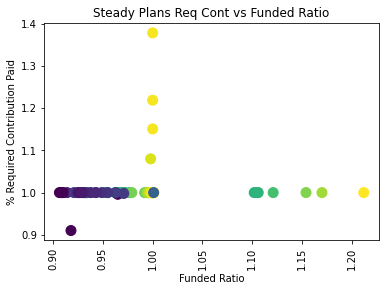

In [23]:
#Created a for loop to automatically build plots based on list of plan IDs
#Steady Plans Funded Ratio vs Contribution Paid
for plans in focus_plans_list:
    plan_x=plan_test_data_df[plan_test_data_df["ppd_id"]==plans]
    plan_x_fundrat=plan_x["ActFundedRatio_GASB"]
    plan_x_contpaid=plan_x["PercentReqContPaid"]
    plan_x_fy=plan_x["fy"]
    plan_x_name=plan_data_df.loc[plan_data_df['ppd_id'] == plans, 'PlanName'].iloc[0]
    plt.title('Steady Plans Req Cont vs Funded Ratio')
    plt.ylabel("% Required Contribution Paid")
    plt.xlabel("Funded Ratio")
    plt.scatter(plan_x_fundrat,plan_x_contpaid,c=plan_x_fundrat, s=100)
    plt.xticks(rotation=90)
    plt.show

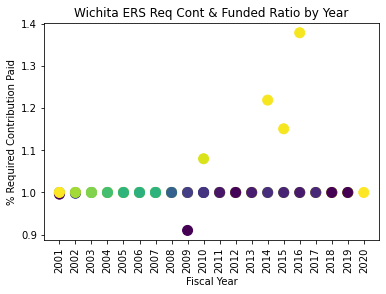

In [12]:
#Steady Plans
for plans in focus_plans_list:
    plan_x=plan_test_data_df[plan_test_data_df["ppd_id"]==plans]
    plan_x_fundrat=plan_x["ActFundedRatio_GASB"]
    plan_x_contpaid=plan_x["PercentReqContPaid"]
    plan_x_fy=plan_x["fy"]
    plan_x_name=plan_data_df.loc[plan_data_df['ppd_id'] == plans, 'PlanName'].iloc[0]
    plt.title(f'{plan_x_name} Req Cont & Funded Ratio by Year')
    plt.ylabel("% Required Contribution Paid")
    plt.xlabel("Fiscal Year")
    plt.scatter(plan_x_fy,plan_x_contpaid,c=plan_x_fundrat, s=100)
    plt.xticks(rotation=90)
    plt.show

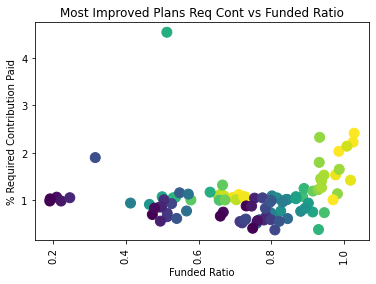

In [25]:
for plans in most_improved_list:
    plan_x=plan_test_data_df[plan_test_data_df["ppd_id"]==plans]
    plan_x_fundrat=plan_x["ActFundedRatio_GASB"]
    plan_x_contpaid=plan_x["PercentReqContPaid"]
    plan_x_fy=plan_x["fy"]
    plan_x_name=plan_data_df.loc[plan_data_df['ppd_id'] == plans, 'PlanName'].iloc[0]
    plt.title('Most Improved Plans Req Cont vs Funded Ratio')
    plt.ylabel("% Required Contribution Paid")
    plt.xlabel("Funded Ratio")
    plt.scatter(plan_x_fundrat,plan_x_contpaid,c=plan_x_fundrat, s=100)
    plt.xticks(rotation=90)
    plt.show

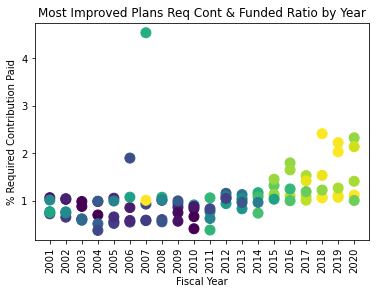

In [27]:
#Most Improved Plans
for plans in most_improved_list:
    plan_x=plan_test_data_df[plan_test_data_df["ppd_id"]==plans]
    plan_x_fundrat=plan_x["ActFundedRatio_GASB"]
    plan_x_contpaid=plan_x["PercentReqContPaid"]
    plan_x_fy=plan_x["fy"]
    plan_x_name=plan_data_df.loc[plan_data_df['ppd_id'] == plans, 'PlanName'].iloc[0]
    plt.title(f'Most Improved Plans Req Cont & Funded Ratio by Year')
    plt.ylabel("% Required Contribution Paid")
    plt.xlabel("Fiscal Year")
    plt.scatter(plan_x_fy,plan_x_contpaid,c=plan_x_fundrat, s=100)
    plt.xticks(rotation=90)
    plt.show

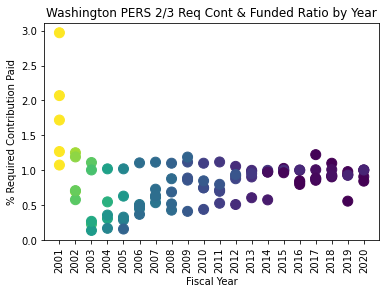

In [14]:
#Least Improved Plans
for plans in least_improved_list:
    plan_x=plan_test_data_df[plan_test_data_df["ppd_id"]==plans]
    plan_x_fundrat=plan_x["ActFundedRatio_GASB"]
    plan_x_contpaid=plan_x["PercentReqContPaid"]
    plan_x_fy=plan_x["fy"]
    plan_x_name=plan_data_df.loc[plan_data_df['ppd_id'] == plans, 'PlanName'].iloc[0]
    plt.title(f'{plan_x_name} Req Cont & Funded Ratio by Year')
    plt.ylabel("% Required Contribution Paid")
    plt.xlabel("Fiscal Year")
    plt.scatter(plan_x_fy,plan_x_contpaid,c=plan_x_fundrat, s=100)
    plt.xticks(rotation=90)
    plt.show

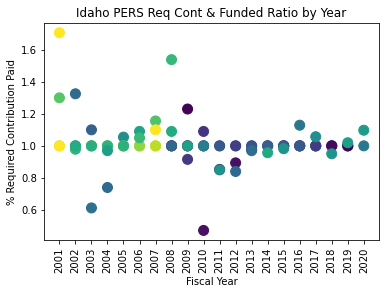

In [15]:
#Hardest Hit Plans
for plans in hardest_hit_list:
    plan_x=plan_test_data_df[plan_test_data_df["ppd_id"]==plans]
    plan_x_fundrat=plan_x["ActFundedRatio_GASB"]
    plan_x_contpaid=plan_x["PercentReqContPaid"]
    plan_x_fy=plan_x["fy"]
    plan_x_name=plan_data_df.loc[plan_data_df['ppd_id'] == plans, 'PlanName'].iloc[0]
    plt.title(f'{plan_x_name} Req Cont & Funded Ratio by Year')
    plt.ylabel("% Required Contribution Paid")
    plt.xlabel("Fiscal Year")
    plt.scatter(plan_x_fy,plan_x_contpaid,c=plan_x_fundrat, s=100)
    plt.xticks(rotation=90)
    plt.show

steady plans


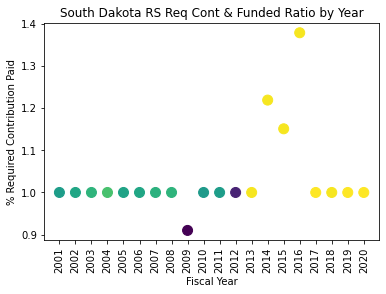

steady plans


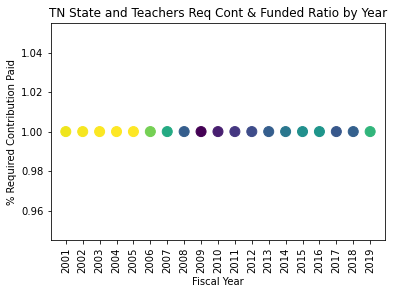

steady plans


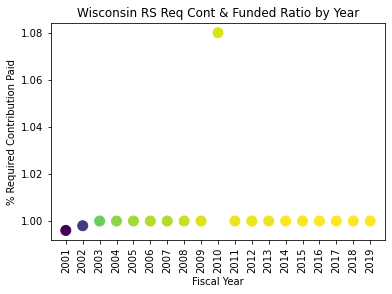

steady plans


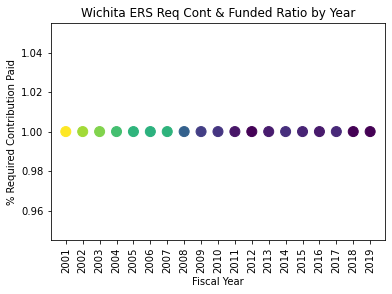

most improved plans


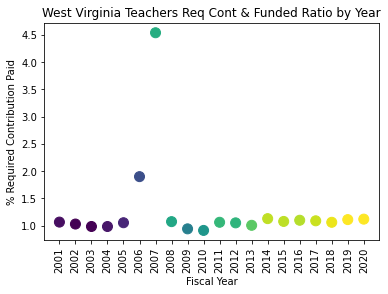

most improved plans


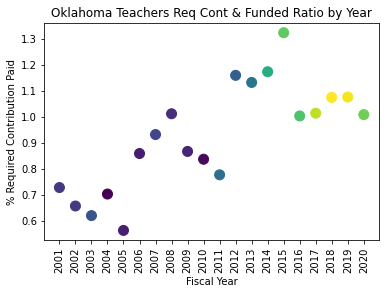

most improved plans


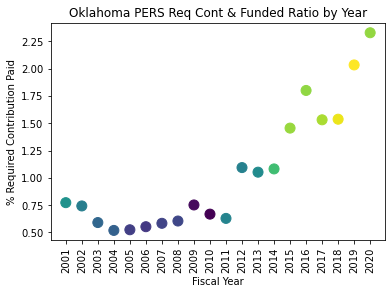

most improved plans


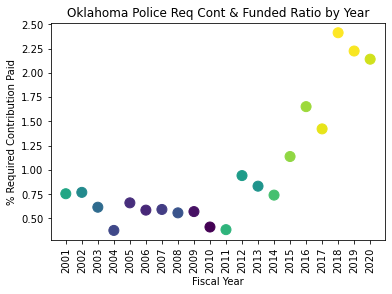

most improved plans


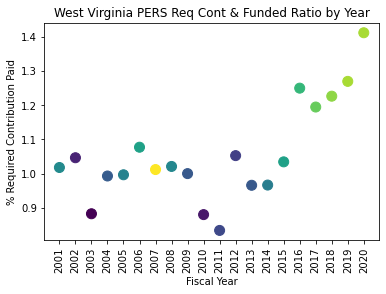

least improved plans


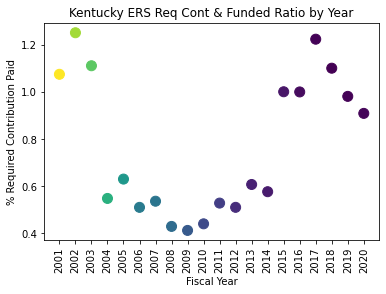

least improved plans


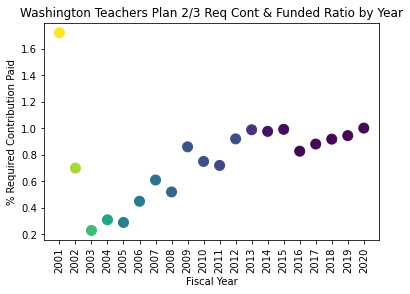

least improved plans


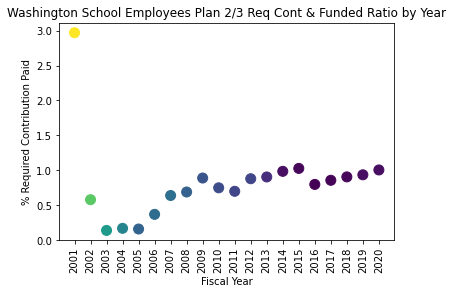

least improved plans


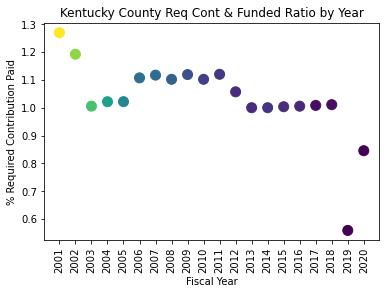

least improved plans


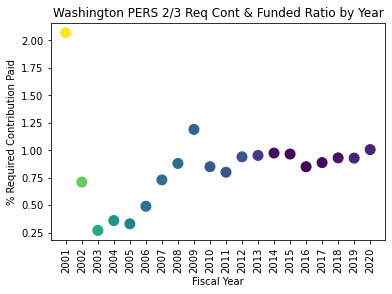

hardest hit plans


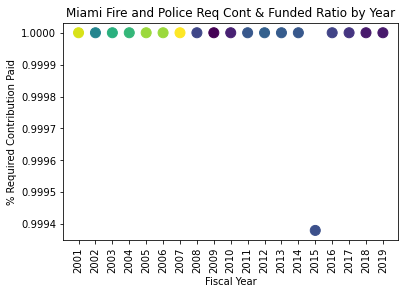

hardest hit plans


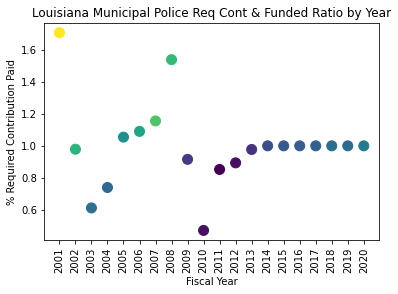

hardest hit plans


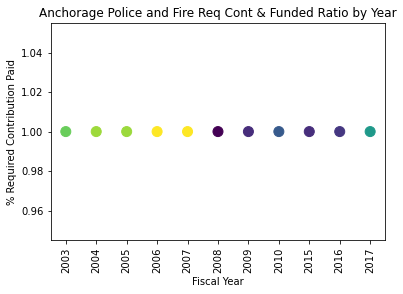

hardest hit plans


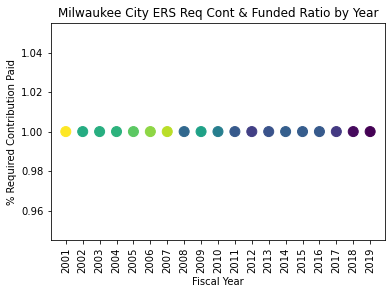

hardest hit plans


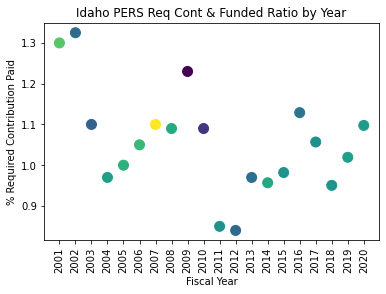

In [17]:
#Generate individual plots for all items in the dictionary
for key,value in study_plans_dict.items():
    for plans in value:
        plan_x=plan_test_data_df[plan_test_data_df["ppd_id"]==plans]
        plan_x_fundrat=plan_x["ActFundedRatio_GASB"]
        plan_x_contpaid=plan_x["PercentReqContPaid"]
        plan_x_fy=plan_x["fy"]
        plan_x_name=plan_data_df.loc[plan_data_df['ppd_id'] == plans, 'PlanName'].iloc[0]
        print(key)
        plt.title(f'{plan_x_name} Req Cont & Funded Ratio by Year')
        plt.ylabel("% Required Contribution Paid")
        plt.xlabel("Fiscal Year")
        plt.scatter(plan_x_fy,plan_x_contpaid,c=plan_x_fundrat, s=100)
        plt.xticks(rotation=90)
        plt.show()